### Izzet Emre Kucukkaya
# CMPE597 HW1

### Read dataset

In [1]:
from tensorflow.keras import datasets
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import os
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
from CNN_Class import Network_Model, Conv2D_Layer, MaxPooling2D_Layer, FC_Layer, default_optimizer, cross_entropy, Softmax_Layer, lr_scheduler

In [2]:
# MNIST dataset

dataset = datasets.mnist.load_data(path="mnist.npz")
X_train = dataset[0][0]
Y_train = dataset[0][1]
X_test = dataset[1][0]
Y_test = dataset[1][1]

X_train = np.array(X_train.astype("float32") / 255) - 0.5
X_test = np.array(X_test.astype("float32") / 255) - 0.5

X_train = np.expand_dims(X_train, 1)
X_test = np.expand_dims(X_test, 1)

#train_set = [[x,y] for x, y in zip(X_train, Y_train)]
#test_set = [[x,y] for x, y in zip(X_test, Y_test)]
#print(test_set)



root = './data'
if not os.path.exists(root):
    os.mkdir(root)
    
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])
# if not exist, download mnist dataset
train_set = dset.MNIST(root=root, train=True, transform=trans, download=True)
test_set = dset.MNIST(root=root, train=False, transform=trans, download=True)
x, y = train_set[0]
batch_size = 100

train_loader = torch.utils.data.DataLoader(
                 dataset=train_set,
                 batch_size=batch_size,
                 shuffle=True)
test_loader = torch.utils.data.DataLoader(
                dataset=test_set,
                batch_size=batch_size,
                shuffle=False)
print(train_set.data.shape)


torch.Size([60000, 28, 28])


### Using Own Implementation

In [ ]:
model = Network_Model(cross_entropy, default_optimizer)
model.add(Conv2D_Layer(channels=4, stride=1, kernel_size=5, activation="relu"))
model.add(MaxPooling2D_Layer(size=2))
model.add(Conv2D_Layer(channels=8, stride=1, kernel_size=5, activation="relu"))
model.add(MaxPooling2D_Layer(size=2))
model.add(FC_Layer(innode=784, outnode=128, activation="relu"))
model.add(FC_Layer(innode=128, outnode=10, activation=None))
model.add(Softmax_Layer())
model.train(X_train, Y_train, X_test, Y_test, epochs=5, lr=0.001, verbose=True)

In [16]:
model = Network_Model(cross_entropy, default_optimizer)
#model.add(Conv2D_Layer(channels=4, stride=1, kernel_size=5, activation="relu"))
#model.add(MaxPooling2D_Layer(size=2))
#model.add(Conv2D_Layer(channels=8, stride=1, kernel_size=5, activation="relu"))
#model.add(MaxPooling2D_Layer(size=2))
model.add(FC_Layer(innode=784, outnode=128, activation="relu"))
model.add(FC_Layer(innode=128, outnode=10, activation=None))
model.add(Softmax_Layer())
model.train(X_train, Y_train, X_test, Y_test, epochs=5, lr=0.001, verbose=True)


 ==> Epoch 0
loss: 0.915794822652423 accuracy: 72.41166666666666 val_loss: 0.5447461418365205 val_accuracy: 82.28 

 ==> Epoch 1
loss: 0.507893183005401 accuracy: 84.565 val_loss: 0.45554378301760473 val_accuracy: 85.96000000000001 

 ==> Epoch 2
loss: 0.43738835383505115 accuracy: 87.10166666666666 val_loss: 0.40009723801150765 val_accuracy: 88.36 

 ==> Epoch 3
loss: 0.3959499268772749 accuracy: 88.69500000000001 val_loss: 0.3703774111705928 val_accuracy: 89.51 

 ==> Epoch 4
loss: 0.3718569841044408 accuracy: 89.62 val_loss: 0.3514857076954318 val_accuracy: 90.25 


In [12]:
#Y = [(np.asarray(x), y) for x, y in test_set]
print(len(X_test))
x,y = model.eval(X_test, Y_test)
print(x,y)
output = model.forward(X_train[0])
print(output, Y_train[0])

10000


KeyboardInterrupt: 

In [5]:
for layer in model.layers:
    print(layer.get_weights())

[0.26196299 0.51155549 0.20483456 0.5286889  0.26470733 0.27759341
 0.4393441  0.37026027 0.39098701 0.47111191 0.31117468 0.36628441
 0.30842754 0.40174261 0.16201551 0.33715956 0.15713726 0.16156354
 0.2732164  0.07819482 0.37020983 0.33792255 0.20407707 0.41528404
 0.34058479 0.40788435 0.16451815 0.33657597 0.52788173 0.30613796
 0.26222565 0.23505825 0.43628606 0.35245653 0.28335547 0.29485247
 0.38437934 0.18201721 0.21252346 0.45360138 0.31635419 0.23005531
 0.28487507 0.2875677  0.40293527 0.30722823 0.15212712 0.32656111
 0.39317303 0.27055397 0.27368961 0.20279693 0.39912879 0.40488398
 0.50533735 0.3682617  0.28810868 0.40871992 0.29683387 0.31612954
 0.36023985 0.28342    0.09916922 0.31316584 0.25817676 0.31479278
 0.28132231 0.19254478 0.36626594 0.27540002 0.46929745 0.36560387
 0.1867702  0.515943   0.36336947 0.42680612 0.35720566 0.36693548
 0.33425489 0.22588023 0.29967457 0.24790375 0.25956882 0.2822315
 0.46644702 0.38483274 0.20778596 0.17293987 0.3785035  0.17589

### Using pytorch

In [5]:
class PytorchNetwork(nn.Module):
    def __init__(self):
      super(PytorchNetwork, self).__init__()

      self.conv1 = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=5, stride=1)
      self.pool1 = nn.MaxPool2d(2, 2)
    
      self.conv2 = nn.Conv2d(in_channels=4, out_channels=8, kernel_size=5, stride=1)
      self.pool2 = nn.MaxPool2d(2, 2)
    
      self.fc1 = nn.Linear(128, 128)
      self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
      x = self.conv1(x)
      x = F.relu(x)
      x = self.pool1(x)
    
      x = self.conv2(x)
      x = F.relu(x)
      x = self.pool2(x)
      
      x = torch.flatten(x, 1)

      x = self.fc1(x)
      x = F.relu(x)
      x = self.fc2(x)

      output = F.log_softmax(x, dim=1)
      return output

model = PytorchNetwork()
print(model)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

PytorchNetwork(
  (conv1): Conv2d(1, 4, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(4, 8, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=128, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [7]:
for epoch in range(5):
    # trainning
    total_loss = 0
    for batch_idx, (x, target) in enumerate(train_loader):
        optimizer.zero_grad()
        x, target = Variable(x), Variable(target)
        out = model(x)
        loss = criterion(out, target)
        total_loss += loss.item()
        loss.backward()
        #optimizer.step()
        if (batch_idx+1) % 100 == 0 or (batch_idx+1) == len(train_loader):
            print('==>>> epoch: {}, batch index: {}, train loss: {:.6f}'.format(
                epoch, batch_idx+1, total_loss))
    # testing
    correct_cnt = 0
    total_cnt = 0
    total_loss = 0
    for batch_idx, (x, target) in enumerate(test_loader):
        x, target = Variable(x), Variable(target)
        out = model(x)
        loss = criterion(out, target)
        _, pred_label = torch.max(out.data, 1)
        total_cnt += x.data.size()[0]
        correct_cnt += (pred_label == target.data).sum()
        total_loss += loss.item()
        if(batch_idx+1) % 100 == 0 or (batch_idx+1) == len(test_loader):
            print('==>>> epoch: {}, batch index: {}, test loss: {:.6f}, acc: {:.3f}'.format(
                epoch, batch_idx+1, total_loss, correct_cnt * 1.0 / total_cnt))

TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'PIL.Image.Image'>

### Q2

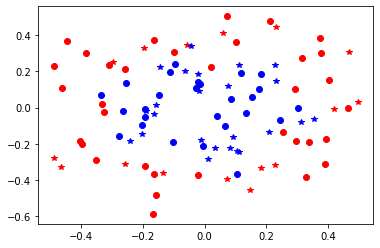

In [37]:
X_test = np.asarray(np.load("./Data/X_test.npy"), dtype=np.float32) / 4
X_train = np.asarray(np.load("./Data/X_train.npy"), dtype=np.float32) / 4
Y_test = np.asarray(np.load("./Data/Y_test.npy"))
Y_train = np.asarray(np.load("./Data/Y_train.npy"))
# Linearly seperable
"""
X_train = np.random.randn(200,2)
X_train[0:100,:] *= 0.1
X_train[0:100,:] -= 0.25
X_train[100:200,:] *= 0.1
X_train[100:200,:] += 0.25
Y_train = np.ones(200, dtype=np.int32)
Y_train[0:100] = 0
X_test = X_train
Y_test = Y_train
"""
X_grid = np.zeros((10000,2), dtype=np.float32)

for i in range(100):
    X_grid[i*100:(i+1)*100, 0] = np.linspace(-0.5,0.5,100)
    X_grid[i*100:(i+1)*100, 1] = -0.5 + i / 100
        

#train_set = np.array([[x,y] for x, y in zip(X_train, Y_train)])
#test_set = np.array([[x,y] for x, y in zip(X_test, Y_test)])
plt.plot(X_test[Y_test == 0, 0], X_test[Y_test == 0, 1], "*r")
plt.plot(X_test[Y_test == 1, 0], X_test[Y_test == 1, 1], "*b")
plt.plot(X_train[Y_train == 0, 0], X_train[Y_train == 0, 1], "or")
plt.plot(X_train[Y_train == 1, 0], X_train[Y_train == 1, 1], "ob")

In [48]:
model = Network_Model(cross_entropy, default_optimizer)
model.add(FC_Layer(innode=2, outnode=8, activation="relu"))
model.add(FC_Layer(innode=8, outnode=8, activation="relu"))
model.add(FC_Layer(innode=8, outnode=2, activation=None))
model.add(Softmax_Layer())
model.train(X_train, Y_train, X_test, Y_test, epochs=1000, lr=1, verbose=True)


 ==> Epoch 0
loss: 0.7320553926156594 accuracy: 46.666666666666664 val_loss: 0.7477132395968071 val_accuracy: 40.0 

 ==> Epoch 1
loss: 0.7353007176122824 accuracy: 45.0 val_loss: 0.7480753615242832 val_accuracy: 40.0 

 ==> Epoch 2
loss: 0.7352745963889833 accuracy: 45.0 val_loss: 0.7478557192088058 val_accuracy: 40.0 

 ==> Epoch 3
loss: 0.7352527550111032 accuracy: 45.0 val_loss: 0.7478272719888273 val_accuracy: 40.0 

 ==> Epoch 4
loss: 0.7352109364313167 accuracy: 45.0 val_loss: 0.7478750060495957 val_accuracy: 40.0 

 ==> Epoch 5
loss: 0.735216677749437 accuracy: 45.0 val_loss: 0.7478874921284815 val_accuracy: 40.0 

 ==> Epoch 6
loss: 0.7352102283685299 accuracy: 45.0 val_loss: 0.7478725352015303 val_accuracy: 40.0 

 ==> Epoch 7
loss: 0.7352031447947351 accuracy: 45.0 val_loss: 0.7478671454939828 val_accuracy: 40.0 

 ==> Epoch 8
loss: 0.7352003565487266 accuracy: 45.0 val_loss: 0.7478649228222168 val_accuracy: 40.0 

 ==> Epoch 9
loss: 0.7351989431409629 accuracy: 45.0 val_lo

loss: 0.7352221287015202 accuracy: 45.0 val_loss: 0.7480454496048102 val_accuracy: 40.0 

 ==> Epoch 81
loss: 0.7352232951115486 accuracy: 45.0 val_loss: 0.7480486055088229 val_accuracy: 40.0 

 ==> Epoch 82
loss: 0.7352172350476124 accuracy: 45.0 val_loss: 0.7480951118424886 val_accuracy: 40.0 

 ==> Epoch 83
loss: 0.7351945996414985 accuracy: 45.0 val_loss: 0.7480388090889752 val_accuracy: 40.0 

 ==> Epoch 84
loss: 0.735190245501047 accuracy: 45.0 val_loss: 0.7480506232950452 val_accuracy: 40.0 

 ==> Epoch 85
loss: 0.7351832727295865 accuracy: 45.0 val_loss: 0.7480229281331966 val_accuracy: 40.0 

 ==> Epoch 86
loss: 0.7351755305429262 accuracy: 45.0 val_loss: 0.7480179497960855 val_accuracy: 40.0 

 ==> Epoch 87
loss: 0.7351724743700832 accuracy: 45.0 val_loss: 0.7480140571398024 val_accuracy: 40.0 

 ==> Epoch 88
loss: 0.735171166403353 accuracy: 45.0 val_loss: 0.7480107102069772 val_accuracy: 40.0 

 ==> Epoch 89
loss: 0.735170284657676 accuracy: 45.0 val_loss: 0.748009605724019

loss: 0.735181909223916 accuracy: 45.0 val_loss: 0.7480913176551369 val_accuracy: 40.0 

 ==> Epoch 162
loss: 0.7351821566046084 accuracy: 45.0 val_loss: 0.7480925438076601 val_accuracy: 40.0 

 ==> Epoch 163
loss: 0.73518221712963 accuracy: 45.0 val_loss: 0.7480939014909653 val_accuracy: 40.0 

 ==> Epoch 164
loss: 0.7351823494423169 accuracy: 45.0 val_loss: 0.7480947900940083 val_accuracy: 40.0 

 ==> Epoch 165
loss: 0.7351839609157146 accuracy: 45.0 val_loss: 0.7480965864249305 val_accuracy: 40.0 

 ==> Epoch 166
loss: 0.735183817762605 accuracy: 45.0 val_loss: 0.7480978836886077 val_accuracy: 40.0 

 ==> Epoch 167
loss: 0.7351839139750714 accuracy: 45.0 val_loss: 0.7480990219799198 val_accuracy: 40.0 

 ==> Epoch 168
loss: 0.7351838729748945 accuracy: 45.0 val_loss: 0.7481003340452428 val_accuracy: 40.0 

 ==> Epoch 169
loss: 0.7351840830581348 accuracy: 45.0 val_loss: 0.7481014836864737 val_accuracy: 40.0 

 ==> Epoch 170
loss: 0.735184131709893 accuracy: 45.0 val_loss: 0.74810280

KeyboardInterrupt: 

In [6]:

pred_label = model.predict(X_test)
output = model.forward(X_train[0])
loss = model.loss(Y_train[0], output)
grad = model.dloss(Y_train[0], output)
print(loss)
print(grad)

5.982619384793512
[-396.47753642    0.        ]


In [38]:
batch_size = 1

train_loader = torch.utils.data.DataLoader(
                 dataset=[(x,y) for x, y in zip(X_train, Y_train)],
                 batch_size=batch_size,
                 shuffle=True)
test_loader = torch.utils.data.DataLoader(
                dataset=[(x,y) for x, y in zip(X_test, Y_test)],
                batch_size=len(Y_test),
                shuffle=False)
grid_loader = torch.utils.data.DataLoader(
                dataset = [(x,0) for x in X_grid],
                batch_size = len(X_grid)
                )

In [66]:
class PytorchNetworkQ2(nn.Module):
    def __init__(self):
      super(PytorchNetworkQ2, self).__init__()
    
      self.fc1 = nn.Linear(2, 8)
      self.fc2 = nn.Linear(8, 8)
      self.fc3 = nn.Linear(8, 2)
    
    def forward(self, x):
      x = self.fc1(x)
      x = F.relu(x)
      x = self.fc2(x)
      x = F.relu(x)
      x = self.fc3(x)
        
      return torch.sigmoid(x)

model2 = PytorchNetworkQ2()
print(model2)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model2.parameters(), lr=0.3)

PytorchNetworkQ2(
  (fc1): Linear(in_features=2, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=2, bias=True)
)


In [67]:
for epoch in range(1000):
    # trainning
    total_loss = 0
    model2.train()
    for batch_idx, (x, target) in enumerate(train_loader):
        optimizer.zero_grad()
        out = model2(x)
        loss = criterion(out, target)
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
        if (batch_idx+1) % 100 == 0 or (batch_idx+1) == len(train_loader):
            print('==>>> epoch: {}, batch index: {}, train loss: {:.6f}'.format(
                epoch, batch_idx+1, total_loss/(batch_idx+1) / len(x)))
    # testing
    correct_cnt, total_loss = 0, 0
    total_cnt = 0
    for batch_idx, (x, target) in enumerate(test_loader):
        x, target = Variable(x), Variable(target)
        out = model2(x)
        
        loss = criterion(out, target)
        _, pred_label = torch.max(out.data, 1)
        total_cnt += x.data.size()[0]
        correct_cnt += (pred_label == target.data).sum()
        total_loss += loss.item()
        if(batch_idx+1) % 100 == 0 or (batch_idx+1) == len(test_loader):
            print('==>>> epoch: {}, batch index: {}, test loss: {:.6f}, test acc: {:.3f}'.format(
                epoch, batch_idx+1, total_loss, correct_cnt * 1.0 / total_cnt))

==>>> epoch: 0, batch index: 60, train loss: 0.696859
==>>> epoch: 0, batch index: 1, test loss: 0.723227, test acc: 0.400
==>>> epoch: 1, batch index: 60, train loss: 0.695231
==>>> epoch: 1, batch index: 1, test loss: 0.726950, test acc: 0.400
==>>> epoch: 2, batch index: 60, train loss: 0.693798
==>>> epoch: 2, batch index: 1, test loss: 0.720197, test acc: 0.400
==>>> epoch: 3, batch index: 60, train loss: 0.692038
==>>> epoch: 3, batch index: 1, test loss: 0.726168, test acc: 0.400
==>>> epoch: 4, batch index: 60, train loss: 0.689298
==>>> epoch: 4, batch index: 1, test loss: 0.712309, test acc: 0.400
==>>> epoch: 5, batch index: 60, train loss: 0.691294
==>>> epoch: 5, batch index: 1, test loss: 0.719322, test acc: 0.400
==>>> epoch: 6, batch index: 60, train loss: 0.690069
==>>> epoch: 6, batch index: 1, test loss: 0.724271, test acc: 0.400
==>>> epoch: 7, batch index: 60, train loss: 0.689386
==>>> epoch: 7, batch index: 1, test loss: 0.727235, test acc: 0.400
==>>> epoch: 8, 

==>>> epoch: 67, batch index: 1, test loss: 0.466714, test acc: 0.850
==>>> epoch: 68, batch index: 60, train loss: 0.476647
==>>> epoch: 68, batch index: 1, test loss: 0.505585, test acc: 0.825
==>>> epoch: 69, batch index: 60, train loss: 0.477298
==>>> epoch: 69, batch index: 1, test loss: 0.482477, test acc: 0.800
==>>> epoch: 70, batch index: 60, train loss: 0.473109
==>>> epoch: 70, batch index: 1, test loss: 0.445618, test acc: 0.875
==>>> epoch: 71, batch index: 60, train loss: 0.466126
==>>> epoch: 71, batch index: 1, test loss: 0.482620, test acc: 0.850
==>>> epoch: 72, batch index: 60, train loss: 0.449260
==>>> epoch: 72, batch index: 1, test loss: 0.435447, test acc: 0.900
==>>> epoch: 73, batch index: 60, train loss: 0.446063
==>>> epoch: 73, batch index: 1, test loss: 0.492336, test acc: 0.750
==>>> epoch: 74, batch index: 60, train loss: 0.476271
==>>> epoch: 74, batch index: 1, test loss: 0.441056, test acc: 0.875
==>>> epoch: 75, batch index: 60, train loss: 0.491479


KeyboardInterrupt: 

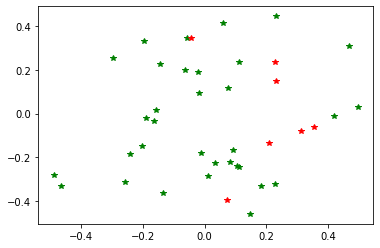

In [68]:
#pred_label = model.predict(X_grid)
for i, (x, k) in enumerate(grid_loader):
    pred_label_grid = model2(x)
    _, pred_label_grid = torch.max(pred_label_grid.data, 1)
boolarray = np.array([x == y for x,y in zip(Y_test, pred_label)])
plt.plot(X_test[boolarray, 0], X_test[boolarray, 1], "*g")
plt.plot(X_test[boolarray == 0, 0], X_test[boolarray == 0, 1], "*r")

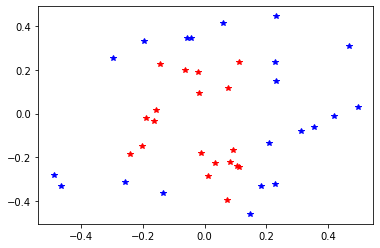

In [69]:
plt.plot(X_test[pred_label == 1, 0], X_test[pred_label == 1, 1], "*r")
plt.plot(X_test[pred_label == 0, 0], X_test[pred_label == 0, 1], "*b")

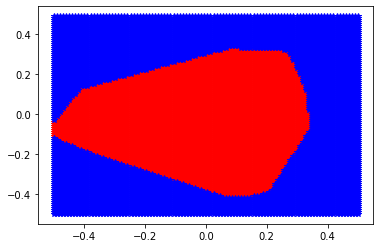

In [70]:
plt.plot(X_grid[pred_label_grid == 1, 0], X_grid[pred_label_grid == 1, 1], "*r")
plt.plot(X_grid[pred_label_grid == 0, 0], X_grid[pred_label_grid == 0, 1], "*b")

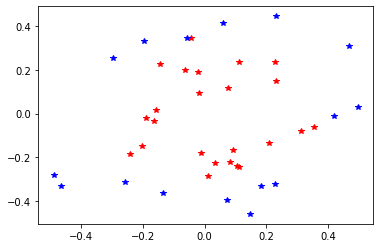

In [30]:
plt.plot(X_test[Y_test == 1, 0], X_test[Y_test == 1, 1], "*r")
plt.plot(X_test[Y_test == 0, 0], X_test[Y_test == 0, 1], "*b")